In [24]:
import numpy as np
import pandas as pd
import xlrd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 把邻接矩阵excel里面的数据存储到邻接矩阵里面
def excel_to_matrix(path):
    table = xlrd.open_workbook(path).sheets()[0]#获取第一个sheet表
    row = table.nrows  # 行数
    col = table.ncols  # 列数
    datamatrix = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵
    for x in range(col):
        cols = np.matrix(table.col_values(x))  # 把list转换为矩阵进行矩阵操作
        datamatrix[:, x] = cols # 按列把数据存进矩阵中
    #数据归一化   
    min_max_scaler = preprocessing.MinMaxScaler()
    datamatrix  = min_max_scaler.fit_transform(datamatrix)
    return datamatrix

datafile = 'input.xlsx'
A = excel_to_matrix(datafile) # 邻接矩阵 A Adjacency_matrix


In [25]:
# 使用最简单的平均值算法通过A计算Q
def A_to_Q_matrix(A):
    row = A.shape[0]  # 行数
    col = A.shape[1]  # 列数
    Q = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵

    #每一横行的元素分别除以本行所有元素的和
    for y in range(row):
        for x in range(col):
            Q[y,:] = A[y,:]/sum(A[y,:])
    return Q
Q = A_to_Q_matrix(A)

In [26]:
# 读入初始值P
P = [1,2,3,4]
P_trans = np.transpose(P)
P_Length = len(P)

# 使用Q和初始值进行迭代P(n+1)=P(n)*(Q)
# 以下为固定次数迭代
Count = 10
P_All = np.zeros((Count+1, P_Length))
P_All[0,:] = np.transpose(P_trans)
for i in range(Count):
    P_trans = Q.dot(P_trans)
    P_All[i+1,:] = np.transpose(P_trans)

# 直到可接受稳定收敛于一个值


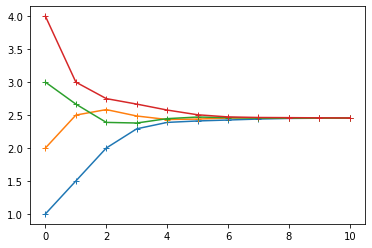

In [31]:
# 画图 每个节点的变量随着迭代次数的曲线图
x = range(Count+1) # 横轴 迭代次数
Y = np.transpose(P_All)
for i in range(P_Length):
    plt.plot(x,Y[i],'+-')
plt.show()

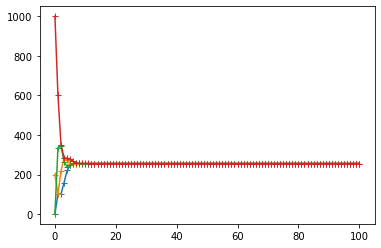

In [36]:
# 固定次数迭代函数
def Iteration_Fixed_Time (P,Count):
    P_trans = np.transpose(P)
    P_Length = len(P)
    # 使用Q和初始值进行迭代P(n+1)=P(n)*(Q)
    P_All = np.zeros((Count+1, P_Length))
    P_All[0,:] = np.transpose(P_trans)
    for i in range(Count):
        P_trans = Q.dot(P_trans)
        P_All[i+1,:] = np.transpose(P_trans)
    return P_All
# 读入初始值P
P = [1,200,3,1000]
Times = 100
P_All=Iteration_Fixed_Time(P,Times)
# 画图 每个节点的变量随着迭代次数的曲线图
x = range(Times+1) # 横轴 迭代次数
Y = np.transpose(P_All)
for i in range(P_Length):
    plt.plot(x,Y[i],'+-')
plt.show()

In [ ]:
# 读入初始值P
P = [1,2,3,4]
Times = 10

In [ ]:
# 直到可接受稳定收敛于一个值，即每一个节点前后两次迭代后得到的值相差小于容差

In [ ]:
#Some Practice
import numpy as np
import matplotlib.pyplot as plt
import pandas
from tqdm import tqdm
import  math

input = pandas.read_excel('input.xlsx')

num = np.linspace(1,100,100,dtype=int)

#折线图
x = [5,7,11,17,19,25]#点的横坐标
k1 = [0.8222,0.918,0.9344,0.9262,0.9371,0.9353]#线1的纵坐标
k2 = [0.8988,0.9334,0.9435,0.9407,0.9453,0.9453]#线2的纵坐标
plt.plot(x,k1,'s-',color = 'r',label="ATT-RLSTM")#s-:方形
plt.plot(x,k2,'o-',color = 'g',label="CNN-RLSTM")#o-:圆形
plt.xlabel("region length")#横坐标名字
plt.ylabel("accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()
plt.savefig('test,png')

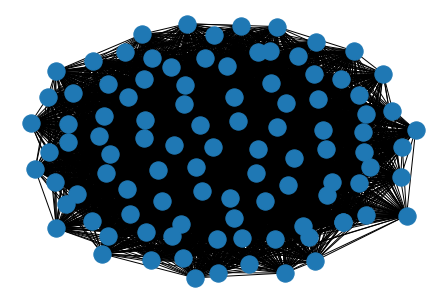

In [10]:
# 用python编写一个随机邻接矩阵（100个点），并绘制其图形。
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

G = nx.Graph()
Matrix = np.array(random.randint((2),size=(100,100)))
#print(Matrix)

for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        if Matrix[i, j]!= 0:  
          G.add_edge(i, j)

nx.draw(G)
plt.show()

In [21]:
# 把excel里面的数据存储到矩阵里面

import numpy as np
import pandas as pd
import xlrd
from sklearn import preprocessing
 
def excel_to_matrix(path):
    table = xlrd.open_workbook(path).sheets()[0]#获取第一个sheet表
    row = table.nrows  # 行数
    col = table.ncols  # 列数
    datamatrix = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵
    for x in range(col):
        cols = np.matrix(table.col_values(x))  # 把list转换为矩阵进行矩阵操作
        datamatrix[:, x] = cols # 按列把数据存进矩阵中
    #数据归一化   
    min_max_scaler = preprocessing.MinMaxScaler()
    datamatrix  = min_max_scaler.fit_transform(datamatrix)
    return datamatrix

datafile = 'input.xlsx'

excel_to_matrix(datafile)

array([[1., 1., 0., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 1.],
       [0., 1., 0., 1.]])